In [250]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

# plt.rcParams["figure.figsize"]=20,10
# plt.rcParams["legend.fontsize"]=15
# plt.rcParams["xtick.labelsize"]=15
# plt.rcParams["ytick.labelsize"]=15
# plt.rcParams["font.size"]=15

%run /Users/dimis/dev/whatsapp-stats/main.py

Text(0.5, 1.0, 'Total Messages')

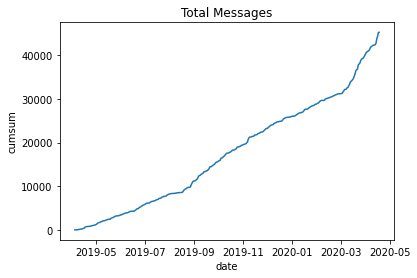

In [89]:
sns.lineplot(data=daily_message_count, x='date', y='cumsum').set_title('Total Messages')

Text(0.5, 1.0, 'Total Messages by User')

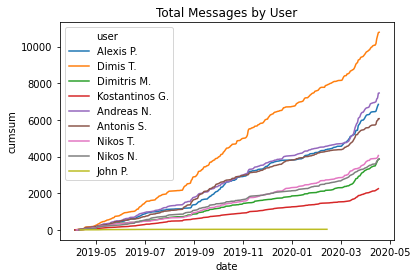

In [90]:
sns.lineplot(data=daily_user_message_count, x='date', y='cumsum', hue='user').set_title('Total Messages by User')

Text(0.5, 1.0, 'Weekly')

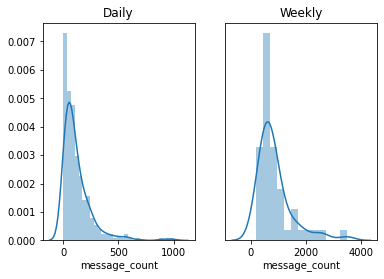

In [91]:
fig, ax = plt.subplots(1,2)
ax[1].set_yticks([])
sns.distplot(df.groupby('date')['message_count'].sum(), ax=ax[0]).set_title('Daily')
sns.distplot(df.groupby('week')['message_count'].sum(), ax=ax[1]).set_title('Weekly')

In [251]:
data = user_stats
data.index.name = 'Total'
data

,image,video,contact_card,gif,audio,document,text,laugh
Total,,,,,,,,
Alexis P.,233,61,0,6,3,12,5917,617
Andreas N.,206,62,0,2,3,2,6319,876
Antonis S.,180,41,0,6,1,0,5295,547
Dimis T.,781,150,0,4,15,1,9529,304
Dimitris M.,197,29,0,13,2,3,3204,421
John P.,1,0,0,0,0,0,31,3
Kostantinos G.,110,9,0,2,0,5,1961,163
Nikos N.,310,72,0,25,5,1,3247,210
Nikos T.,171,36,0,5,6,0,3661,181


In [125]:
data = user_stats/(df.date.max()-df.date.min()).days
data.index.name = 'Daily Average'
round(data,1)

,image,video,contact_card,gif,audio,document,text,laugh
Daily Average,,,,,,,,
Alexis P.,0.6,0.2,0.0,0.0,0.0,0.0,15.9,1.4
Andreas N.,0.5,0.2,0.0,0.0,0.0,0.0,16.7,2.3
Antonis S.,0.5,0.1,0.0,0.0,0.0,0.0,14.3,1.1
Dimis T.,2.1,0.4,0.0,0.0,0.0,0.0,25.2,0.7
Dimitris M.,0.5,0.1,0.0,0.0,0.0,0.0,8.7,0.9
John P.,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0
Kostantinos G.,0.3,0.0,0.0,0.0,0.0,0.0,5.2,0.4
Nikos N.,0.8,0.2,0.0,0.1,0.0,0.0,8.8,0.4
Nikos T.,0.5,0.1,0.0,0.0,0.0,0.0,9.8,0.3


Text(0.5, 1.0, 'Average Message Hour/Day')

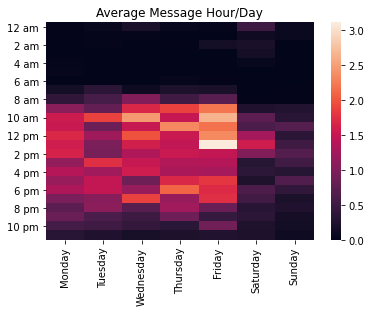

In [217]:
import calendar
def get_am_or_pm(idx):
    if idx / 12 < 1:
        return ' am'
    return ' pm'

def get_time(idx):
    am_or_pm = get_am_or_pm(idx)
    time = idx % 12
    if time ==0:
        return '12' + am_or_pm
    return str(time) + am_or_pm
    
data = df.groupby(['weekday', 'hour'])['message_count'].sum() / (
    df.date.max() - df.date.min()
).days
data = data.reset_index().pivot(columns='weekday', index='hour', values='message_count').fillna(0)
data = round(data, 2)
data.columns = data.columns.map(lambda x: calendar.day_name[x])
data.columns.name = ''
data.index = data.index.map(get_time)
data.index.name = ''
sns.heatmap(data).set_title('Average Message Hour/Day')

Text(0.5, 1.0, 'Average Message Day/Month')

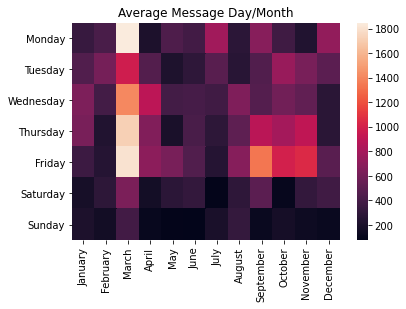

In [218]:
data = df.groupby(['month', 'weekday', 'year'])['message_count'].sum().reset_index()
data = data.groupby(['month', 'weekday'])['message_count'].mean()
data = data.reset_index().pivot(columns='month', index='weekday', values='message_count').fillna(0)
data = round(data, 2)
data.index = data.index.map(lambda x: calendar.day_name[x])
data.columns = data.columns.map(lambda x: calendar.month_name[x])
data.columns.name = ''
data.index.name = ''
sns.heatmap(data).set_title('Average Message Day/Month')

In [229]:
is_laugh('haha')

True

In [241]:
df.loc[45265, 'value'].encode('utf-8')==b'\xf0\x9f\xa4\xa6\xf0\x9f\x8f\xbc\xe2\x80\x8d\xe2\x99\x82\xef\xb8\x8f'


True